<a href="https://colab.research.google.com/github/god05212/Machine-Learning/blob/main/%EA%B3%A0%EA%B0%9D%EC%9D%B4_%ED%98%B8%ED%85%94%EC%98%88%EC%95%BD%EC%9D%84_%EC%B7%A8%EC%86%8C%ED%95%A0%EC%A7%80_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='blue'> 1. Importing Dataset </font>


In [ ]:
from google.colab import files
updloaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


> **변수에 대한 설명**  
Booking_ID : 각 예약의 고유 식별자  
no_of_adults : 성인 수  
no_of_children : 자녀 수  
no_of_weekend_nights : 게스트가 호텔에 투숙했거나 예약한 주말 밤(토요일 또는 일요일)의 수  
no_of_week_nights : 게스트가 호텔에 숙박했거나 숙박을 예약한 주중 밤 수(월요일~금요일)  
type_of_meal_plan : 고객이 예약한 식사 플랜 유형  
required_car_parking_space : 고객이 주차 공간을 필요로 합니까? (0 - 아니오, 1- 예)  
room_type_reserved : 고객이 예약한 객실 유형. 값은 INN Hotels에서 암호화(인코딩)됩니다.  
lead_time : 예약일과 도착일 사이의 일수  
arrival_year : 도착 연도  
arrival_month : 도착한 달  
arrival_date : 해당 월의 날짜  
market_segment_type : 시장 부문 지정.  
repeatd_guest : 고객이 반복 손님입니까? (0 - 아니오, 1- 예)  
no_of_previous_cancellations : 현재 예약 이전에 고객이 취소한 이전 예약 수  
no_of_previous_bookings_not_canceled : 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수  
avg_price_per_room : 예약 당일 평균 가격. 객실 가격은 유동적입니다. (유로)  
no_of_special_requests : 고객이 요청한 총 특별 요청 수(예: 높은 층, 객실에서 보이는 전망 등)  
booking_status : 예약이 취소되었는지 여부를 나타내는 플래그입니다.

In [ ]:
# dataset 가져오기
import pandas as pd
# 변수의 이름 "df"를 사용하여 데이터베이스 읽기
df = pd.read_csv('Hotel Reservations.csv')
# dataset 상위 5개만 보기
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# 행 36275, 열 19
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# 이 dataset에는 NaN 값이 없음
df.isnull().sum().sum() == 0

True

In [ ]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

> 여기서 범주형 및 연속형 변수가 있고, 이 'Booking_ID'열이 사용되지 않을 수 있으며, null 값이 없는 것도 확인할 수 있습니다.

### <font color='blue'> 2. Data Analysis </font>


> 변수 간의 상관 관계를 확인.

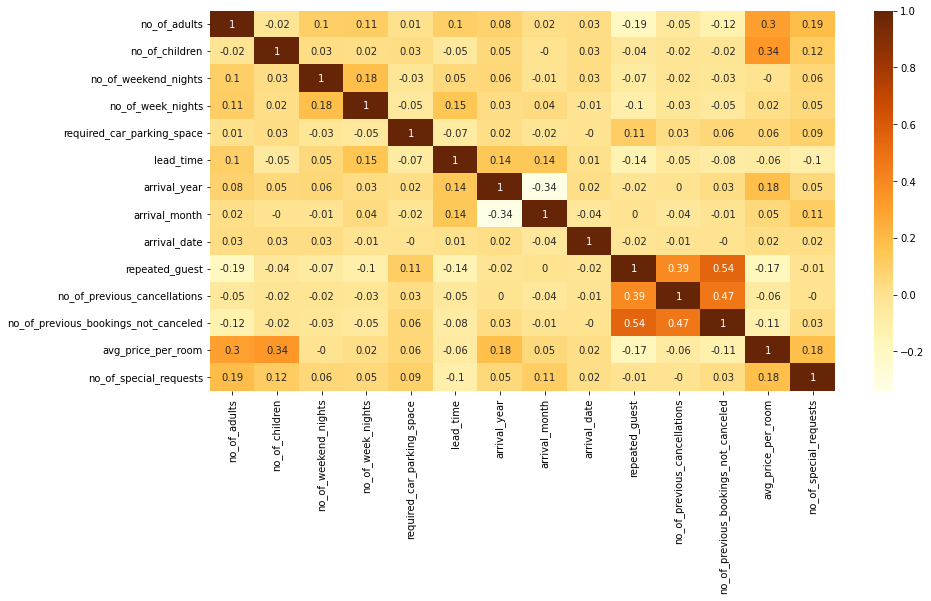

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

양의 상관관계 예시(r > 0) : 지능지수와 성적, 키와 몸무게  
음의 상관관계 예시(r < 0) : 농작물 수확량과 가격, 고도와 기온  
무의 상관관계 예시(r = 0) : 범죄율과 아이스크림 판매량  

-1.0 <= r <= -0.7 : 매우 강한 음(-)의 상관관계  
-0.7 < r <= -0.3 : 비교적 강한 음(-)의 상관관계  
-0.3 < r <= -0.1 : 약한 음(-)의 상관관계  
-0.1 < r <= 0.1 : 상관관계 없음  
0.1 < r <= 0.3 : 약한 양(+)의 상관관계  
0.3 < r <= 0.7 : 비교적 강한 양(+)의 상관관계  
0.7 < r <= 1.0 : 매우 강한 양(+)의 상관관계

> 히트맵을 통해 우리는 변수들 사이에 강한 상관관계가 없다는 것을 알 수 있다.

#### Categorical Variables

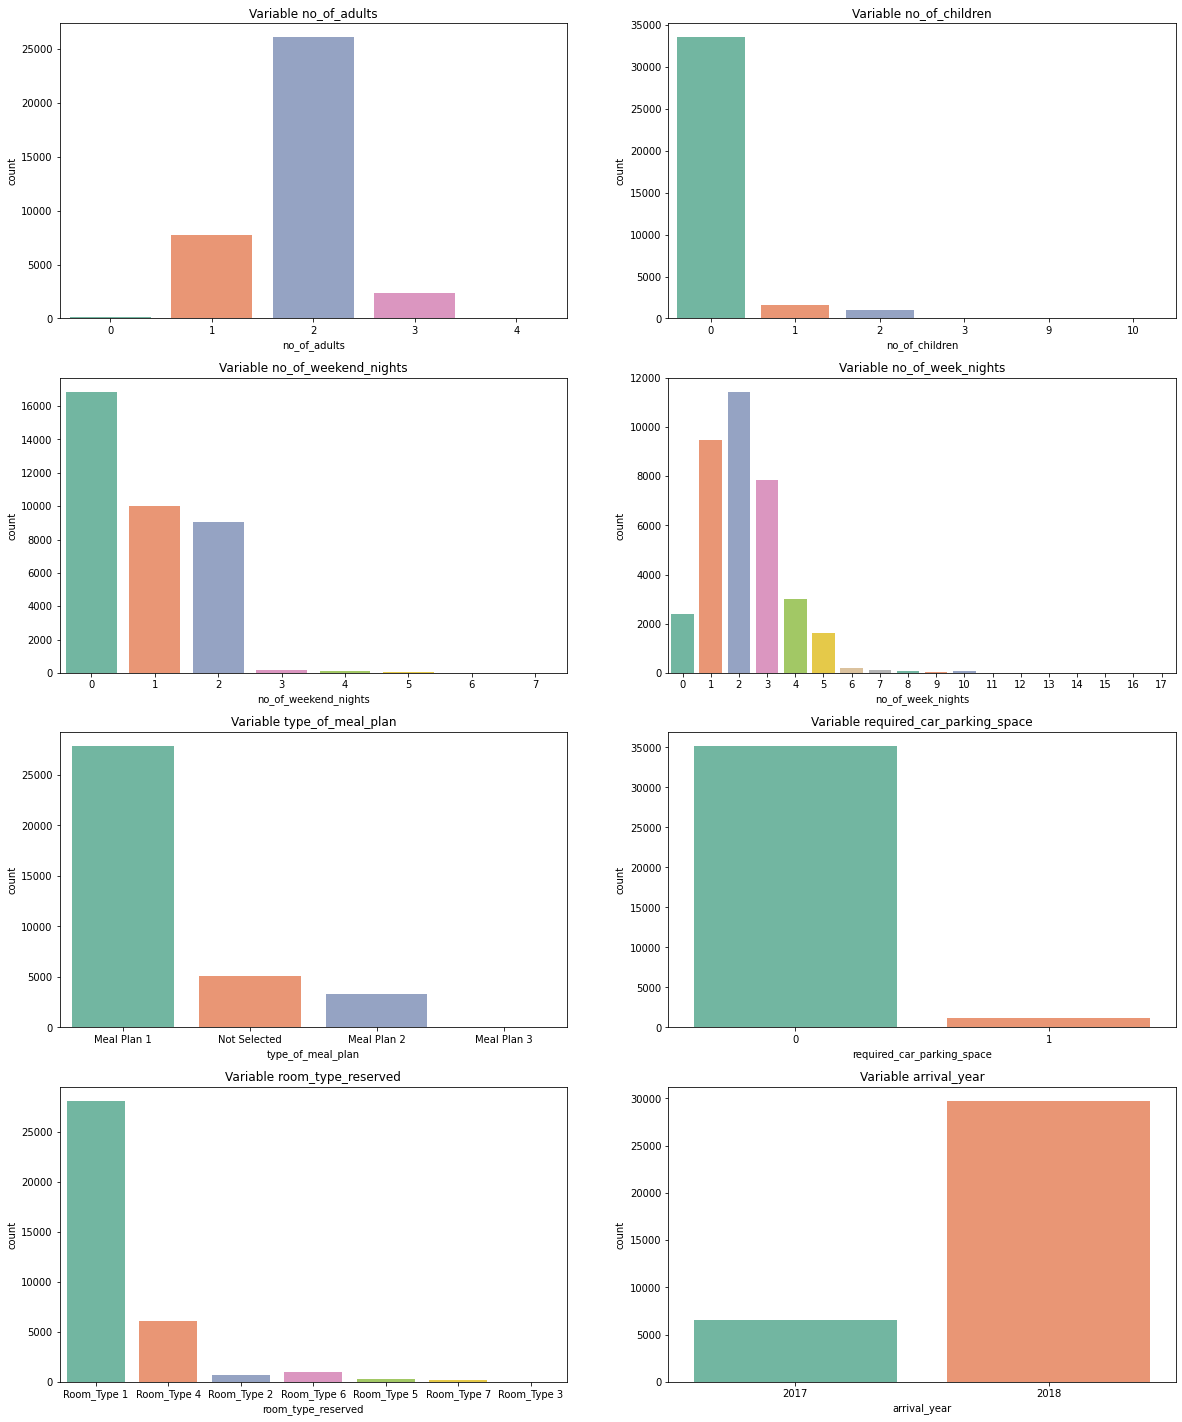

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

> 범주형 변수를 보면, 성인 2명이 있는 방에 대해 대부분의 예약이 이루어지며, 아이가 없는 방은 일반적으로 단기 예약이며, 많은 경우가 장기 예약이 아니며, 대부분의 예약은 type_of_meal_plan_1을 선택하고, 차량 공간이 필요하지 않으며, 가장 예약된 객실 유형은 1번과 4번 유형이며, 대부분의 데이터는 2018년 예약임을 알 수 있습니다.

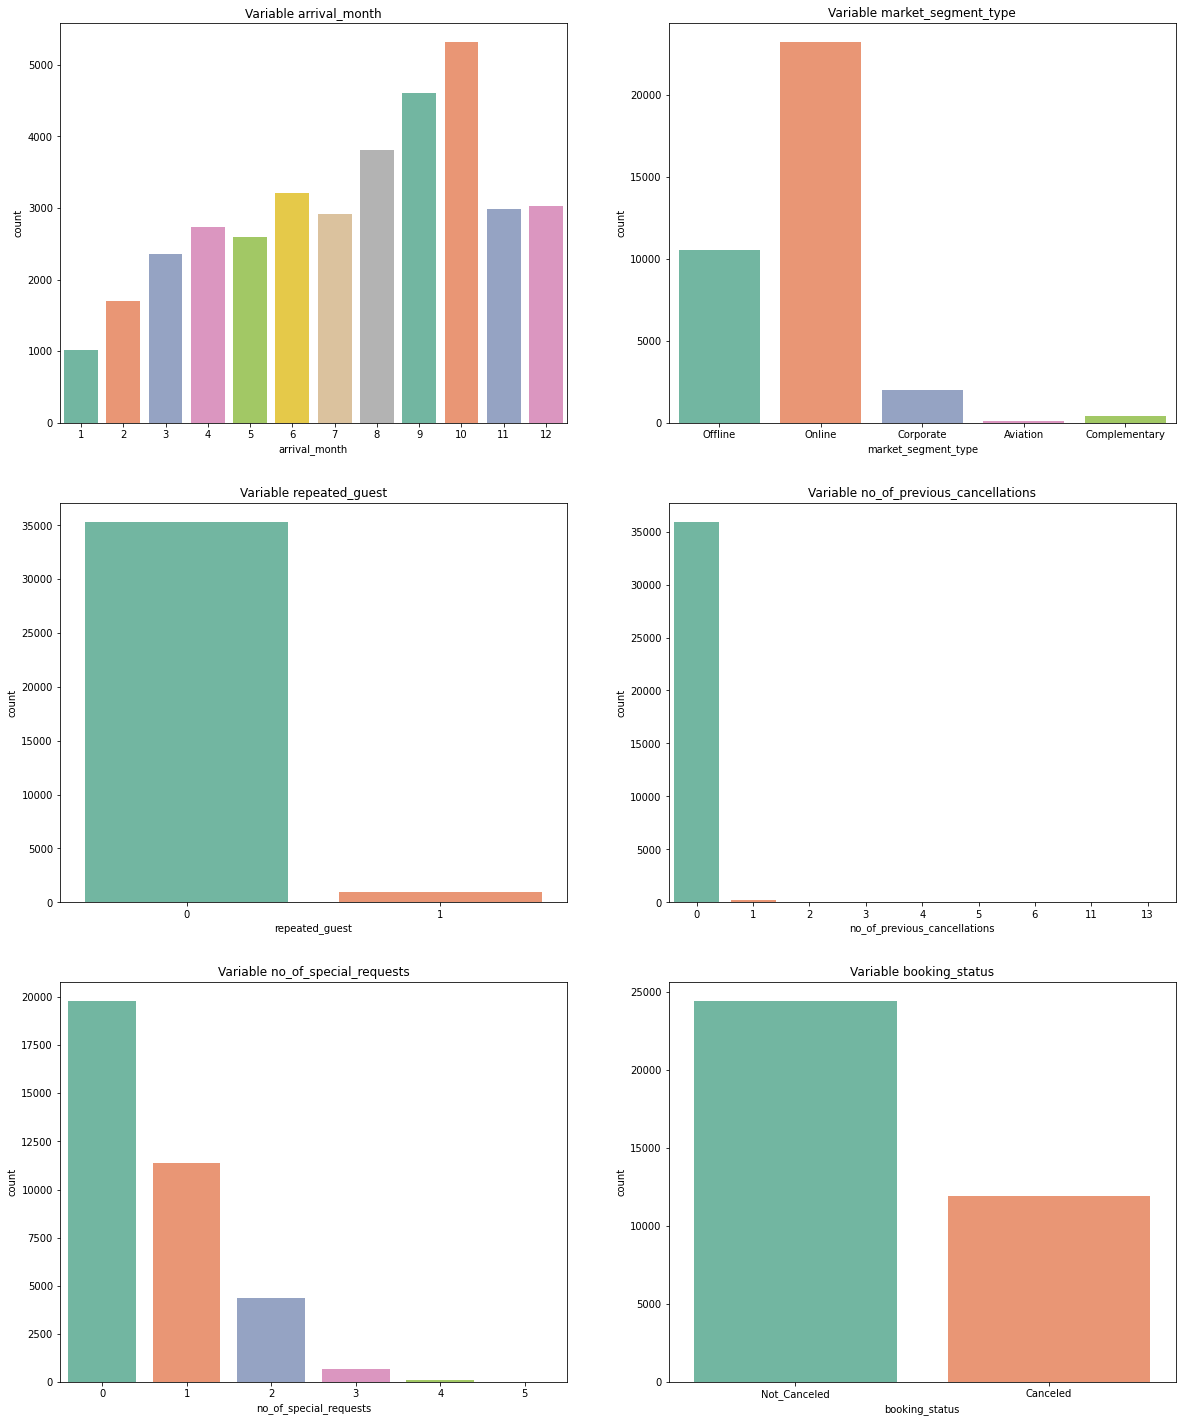

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

> 월별 예약을 보면 1월부터 10월까지 예약 건수가 점차 증가하다가 11월과 12월에 다시 감소하고, 대부분의 예약은 온라인으로 이루어지며, 대부분의 투숙객들은 호텔에 가본 적이 없는 투숙객들이며, 보통 취소를 한 적이 없는 투숙객들이다 특수 요청의 수가 많을수록 데이터가 줄어듭니다. target 변수를 보면 약 65%의 예약이 취소되지 않은 것을 알 수 있습니다.

#### Continous Variables

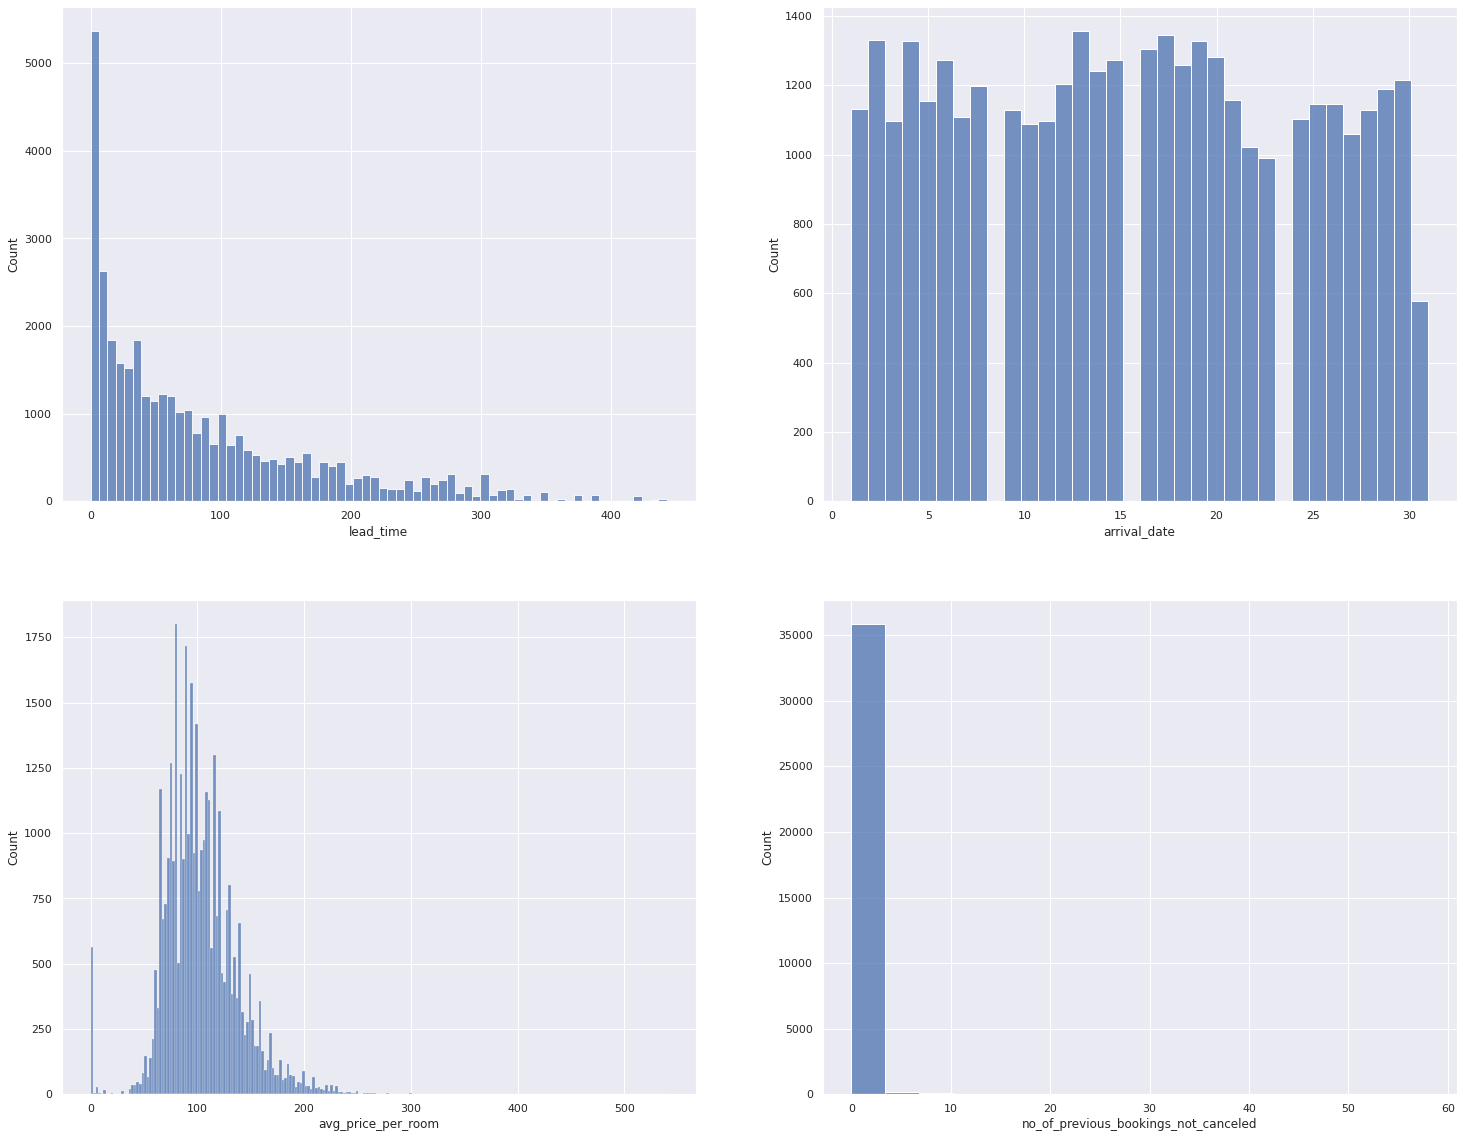

In [ ]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

> 연속 변수를 보면 일반적으로 너무 길지 않게 예약이 이루어지며 시간이 길수록 예약 횟수가 적다는 것을 알 수 있습니다. 데이터의 상위 항목은 보통 객실 평균 가격 100유로이며 취소되지 않은 이전 예약의 수는 없습니다.

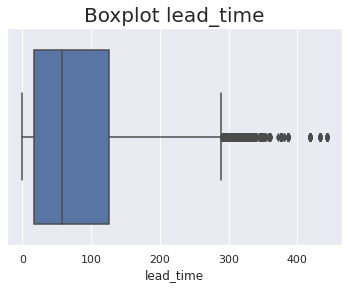

In [ ]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

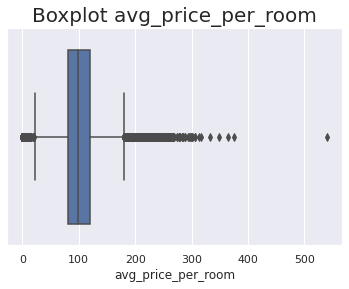

In [ ]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

> Boxplot을 확인할 때 outliers가 있다는 것을 알 수 있습니다.

#### Analysis

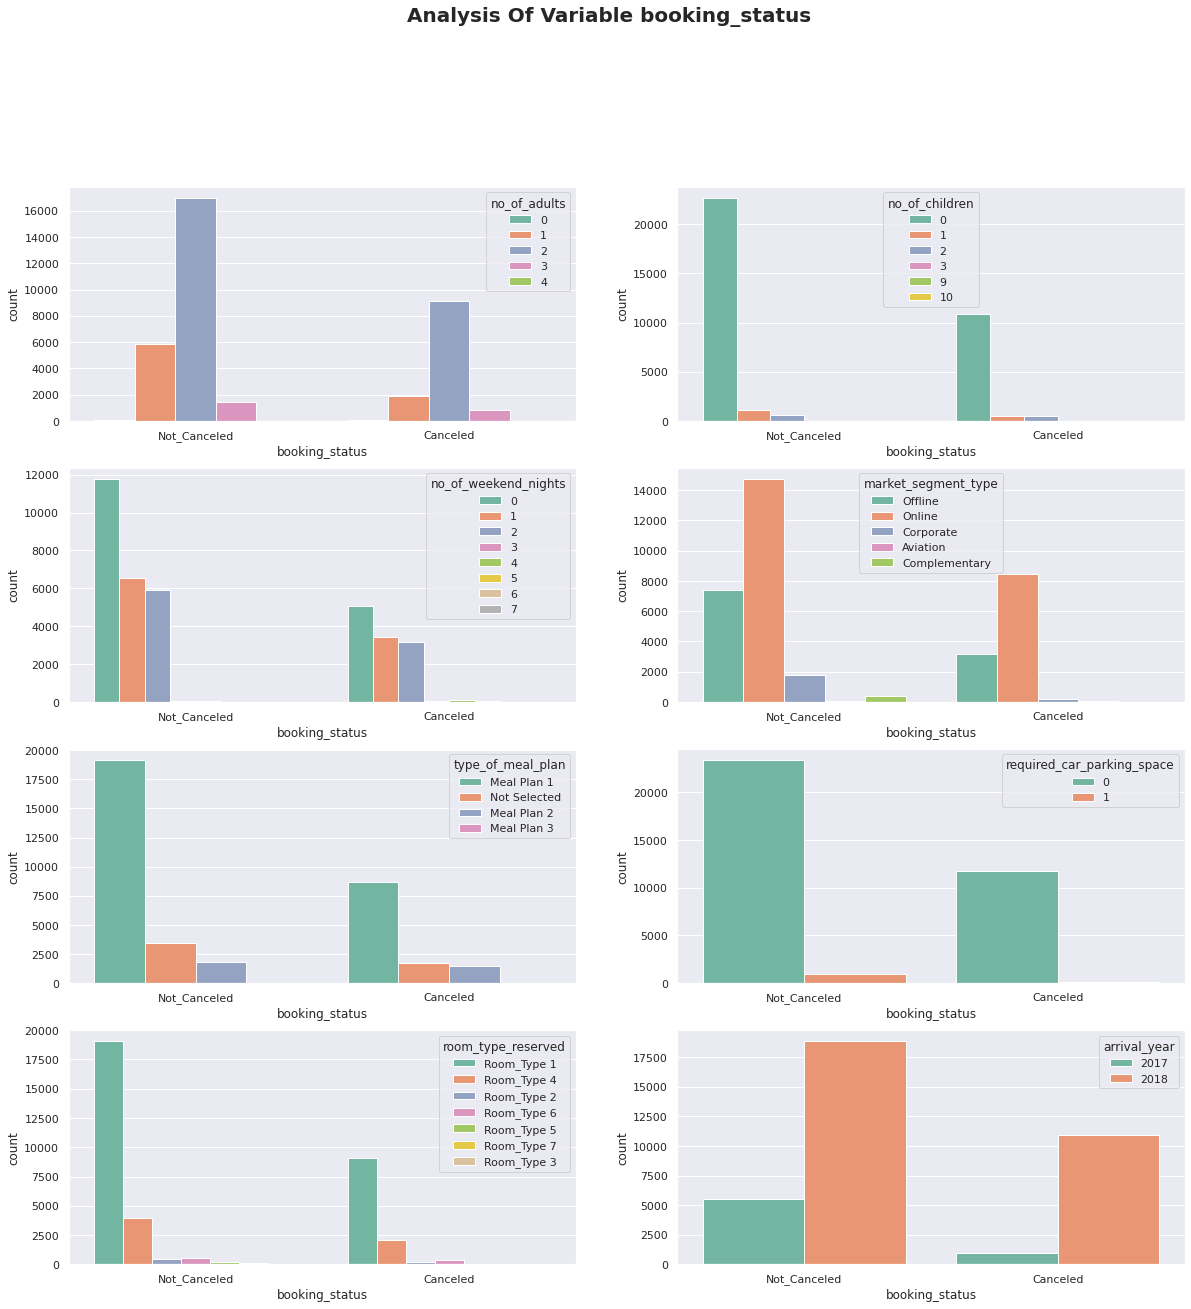

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

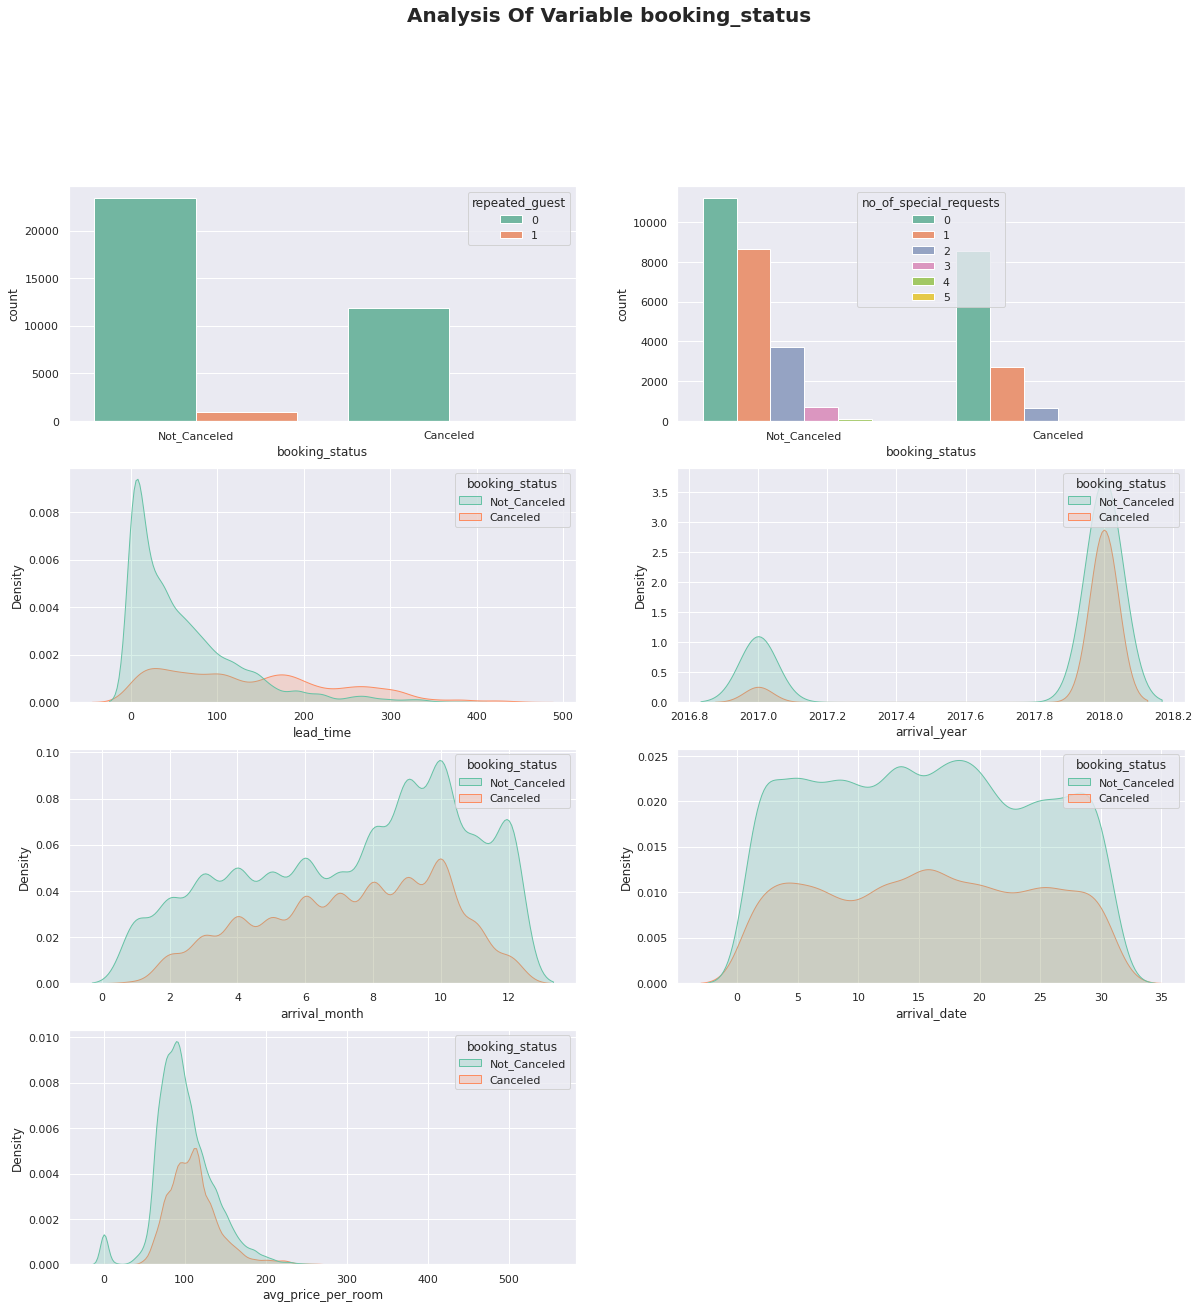

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

> target 변수를 살펴보면 주차 공간을 요청하는 손님들, 이전에 머물렀던 손님들은 일반적으로 예약을 취소하지 않는 손님들이다. 특별한 요청을 하고, 요청이 많을수록 손님들은 취소할 가능성이 적다. 그러나 lead_time이 길수록 취소할 가능성은 높아진다. 또 다른 흥미로운 견해는 1년의 마지막 3개월은 취소율이 적다는 것과 기울기는 적지만 방이 비쌀 수록 더 많은 취소를 경험할 수 있다는 것을 볼 수 있다.

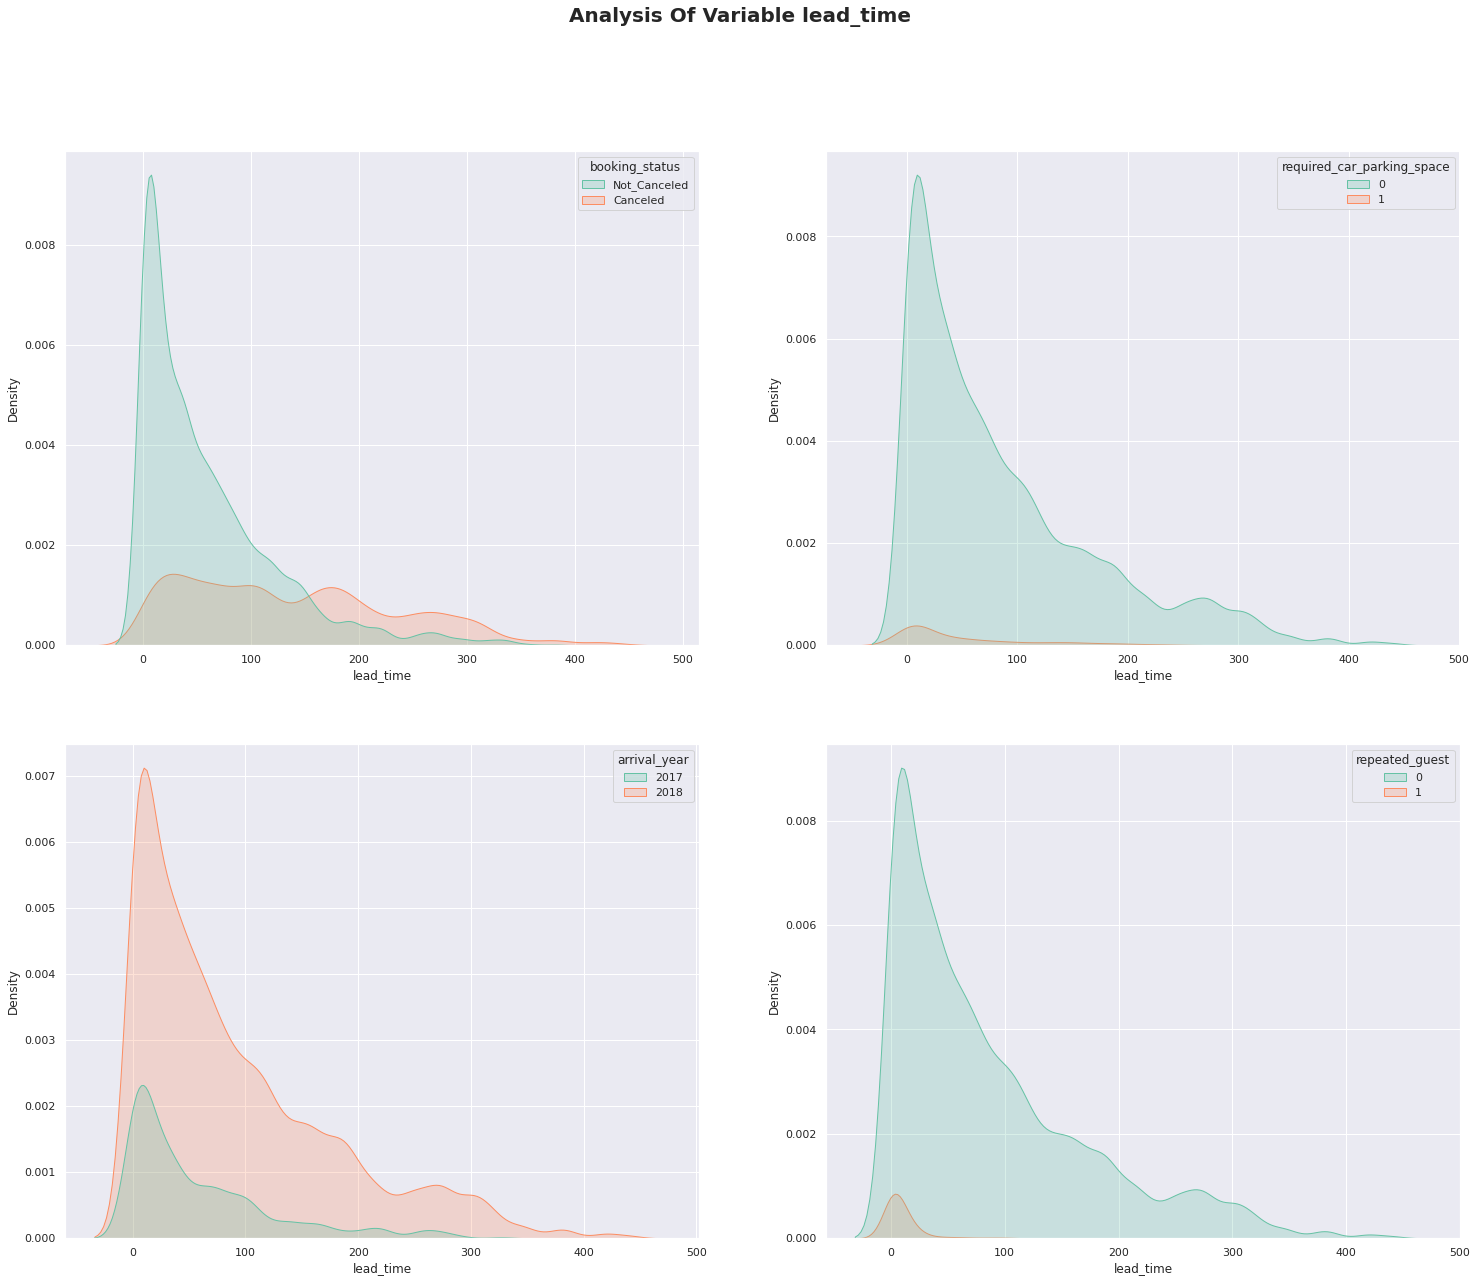

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

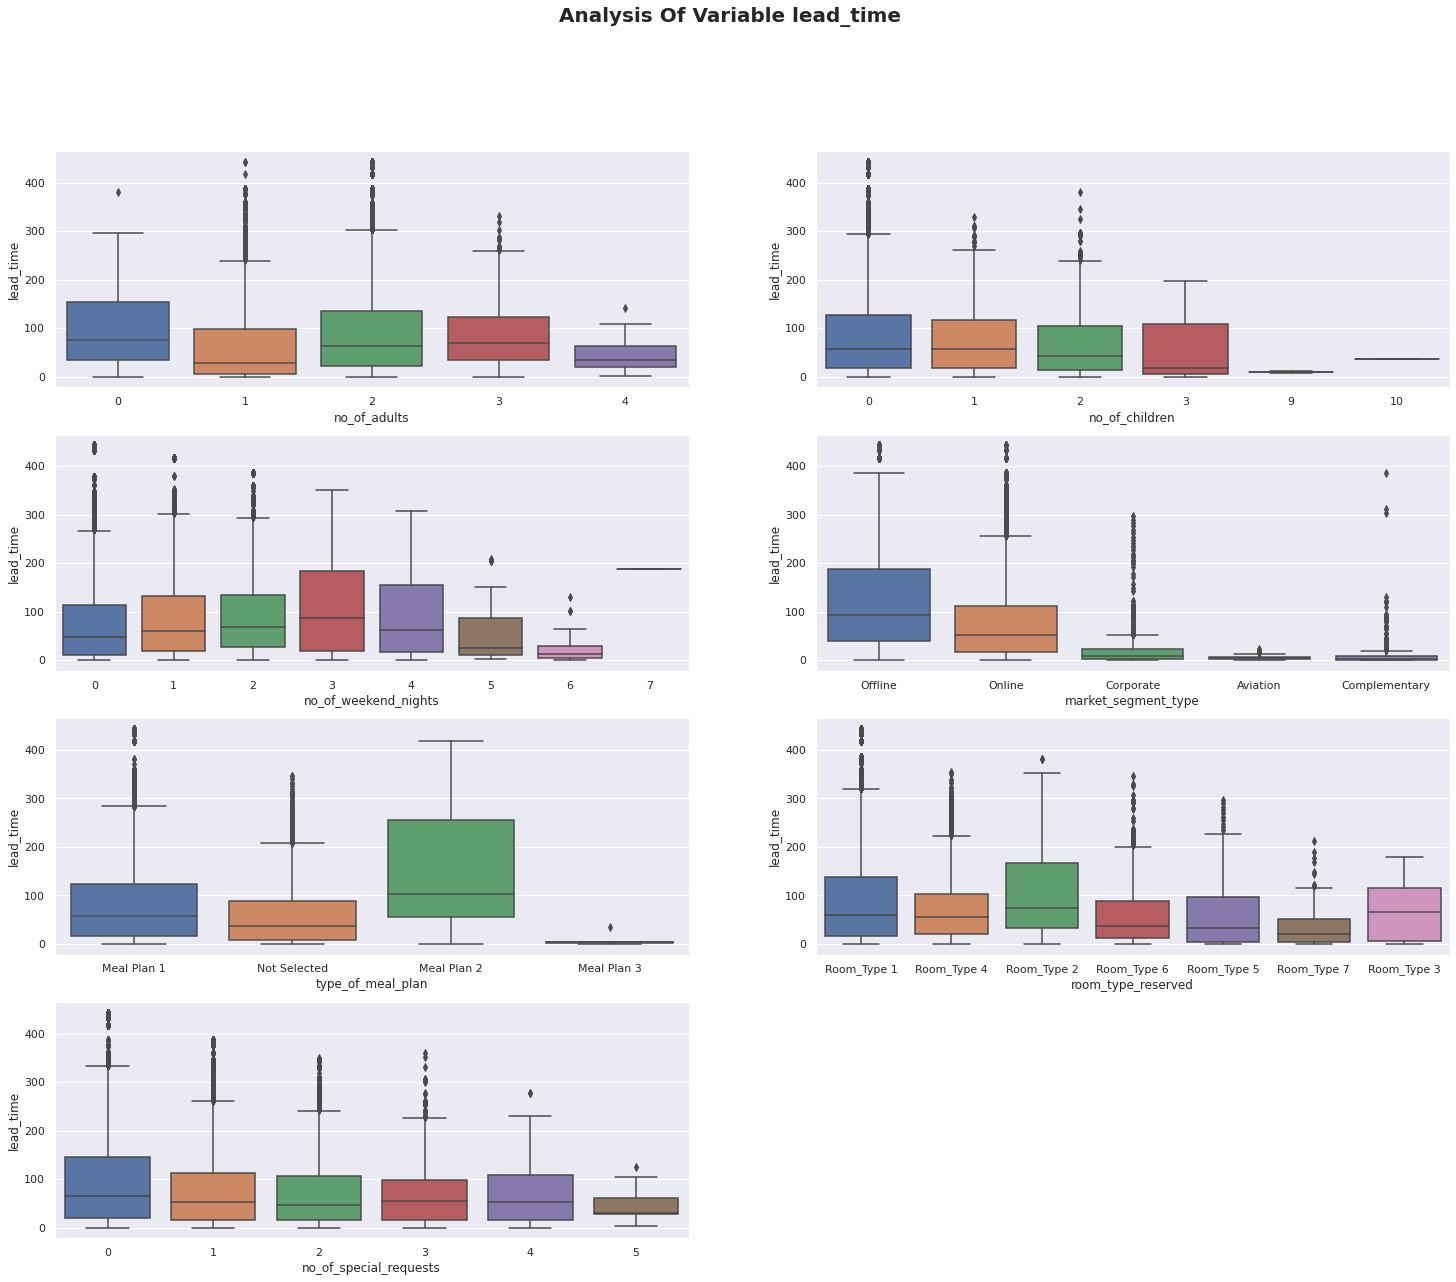

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

> 앞서 살펴본 것처럼 canceled과 non-cancelled가 가장 많이 구분된 것이 lead_time 변수였기 때문에 좀 더 자세히 살펴볼 것입니다. 일반적으로 주차 공간을 요청하는 사람들은 lead_time이 더 짧다는 것을 알 수 있는데, 호텔에 이미 투숙한 손님들도 마찬가지입니다. 우리가 집중해야 할 다른 변수들이 있는데, 변수 no_weekend_nights은 보통 3~4박을 하는 사람들이 더 길고, market_segment_type을 볼 때도 특별한 이유로 손님들은 보통 lead_time이 높지 않으며, type_of_meal_plan을 보면, meal_plan2를 이용하는 손님들은 보통 lead_time이 깁니다. 또한 방의 유형을 볼 때, 몇몇 방은 다른 방들 보다 lead_time이 빠른 걸 알 수 있습니다. no_of_special_requests을 볼 때, 더 많은 요청을 할 수록 lead_time은 줄어듭니다.

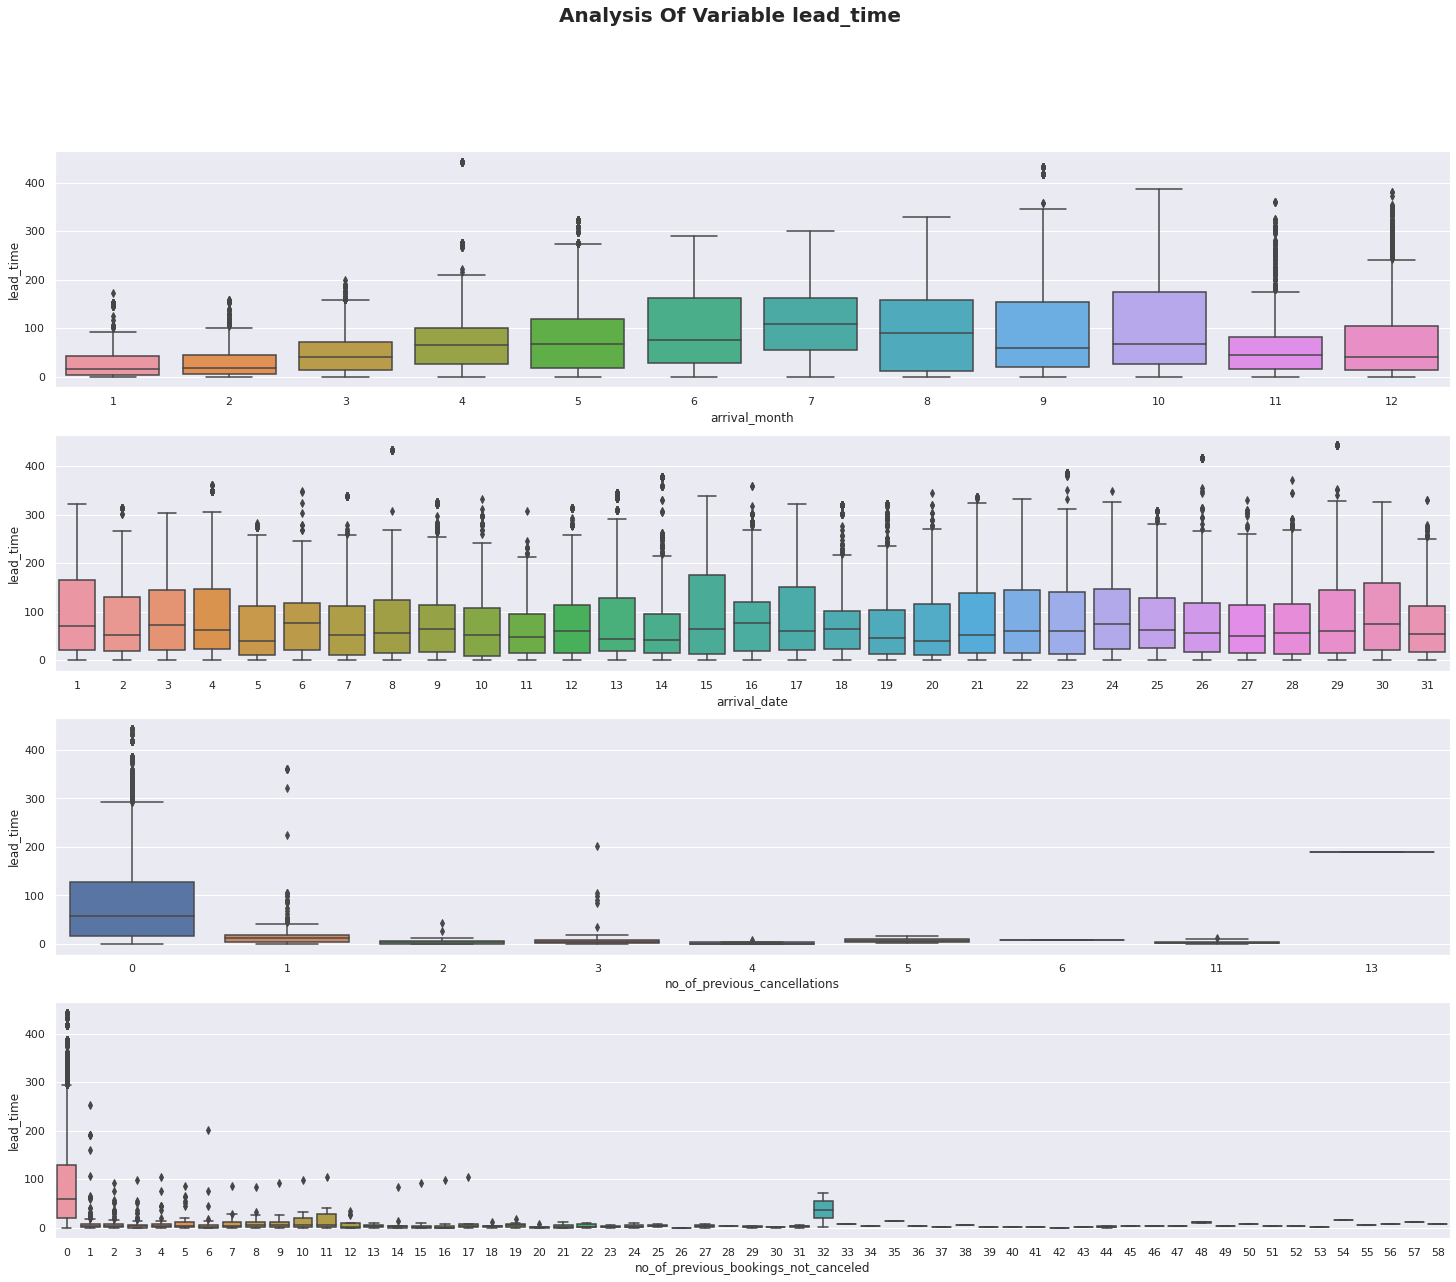

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

> 연초와 연말이 lead_time이 짧은 달이고, 현재 예약 이전에 고객이 취소한 이전 예약 수와 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수를 보면 같은 패턴을 볼 수 있는데, 이미 호텔을 알고 있는 사람들은 lead_time이 길지 않다는 것을 알 수 있다.

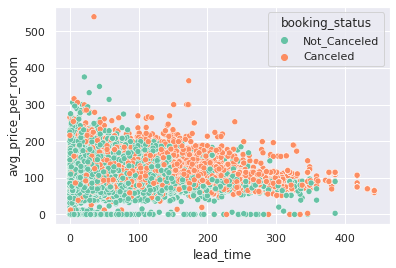

In [ ]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

> 산점도를 보면 lead_time과 avg_price_per_room이 높을 수록 취소할 가능성이 높다는 것을 알 수 있습니다.

### <font color='blue'> 3. Model Building </font>


In [ ]:
df = df.drop('Booking_ID', axis = 1)

In [ ]:
df.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


> 사용되지 않을 Booking_ID를 제거합니다.

#### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


> 레이블 인코더를 사용하여 범주형 변수를 숫자형 변수로 변환할 것 입니다.

In [ ]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

> features 변수와 target 변수로 구분합니다.

#### Balancing Classes

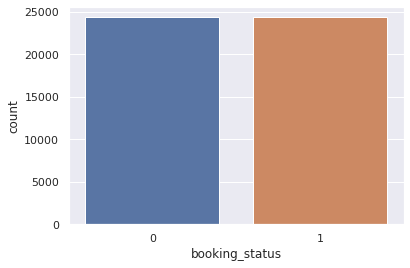

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

> 우리는 한 클래스의 값이 많고 다른 클래스의 값이 적기 때문에 오버 샘플링을 사용하여 클래스의 균형을 맞출 것입니다. 오버 샘플링(Oversampling) 기법은 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 학습에 충분한 데이터를 확보하는 기법입니다. 오버 샘플링 방식이 일반적으로 언더 샘플링보다 예측 성능이 더 유리하기 때문에 많은 경우 오버 샘플링을 주로 사용합니다.

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

> 여기서는 StandardScaler를 사용하여 데이터를 동일한 규모로 배치합니다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

> 데이터를 훈련 테스트로 변환, 여기서는 데이터의 30%를 기계 학습 모델을 테스트하는 데 사용할 것이다.

#### Naive Bayes

##### -Gaussian Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

> 여기서는 나이브 베이즈 모델을 사용하고 정규 데이터를 사용하여 가우스 모델을 테스트합니다.


0.5662839961732951

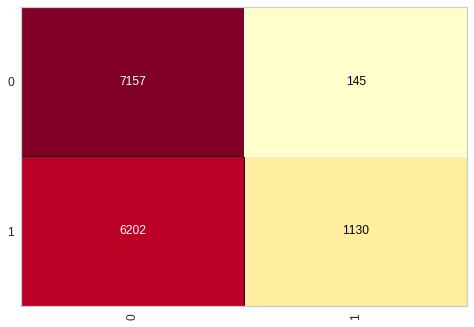

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.54      0.98      0.69      7302
           1       0.89      0.15      0.26      7332

    accuracy                           0.57     14634
   macro avg       0.71      0.57      0.48     14634
weighted avg       0.71      0.57      0.48     14634



In [ ]:
score_naive_gaussian = 0.5662839961732951

> **결과**  
56.62%의 정확도로 좋은 모델은 아니다. 취소될 예약을 예측하는 것을 많이 배웠지만 실제로는 그렇지 않은 예약을 배우지 못했다.

#### Decision Tree

> 이번에는 Decision Tree모델을 사용하고 엔트로피 및 지니 계산을 테스트합니다.  
여기서는 GridSearch을 적용하여 사용하기에 가장 좋은 metrics가 무엇인지 확인합니다.  
지니 지수, 엔트로피 지수는 불순도를 측정하는 척도로 지니 지수, 엔트로피 지수의 값이 낮을 수록 순수도가 높음! (좋음)


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.8668657630332444


> Decision Tree 실행

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

0.8665436654366544

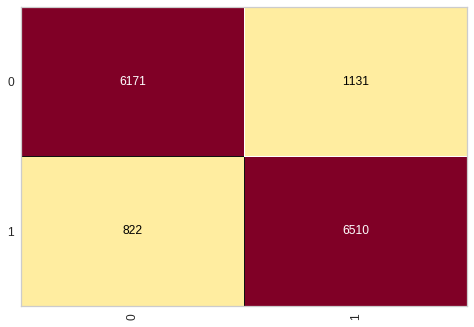

In [ ]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7302
           1       0.85      0.89      0.87      7332

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



In [ ]:
score_tree = 0.8665436654366544

> **결과**  
86.65%의 정확도를 보였습니다. 여기서 우리는 Naive Bayes와 비교했을 때 모델이 두 결과를 모두 예측할 수 있었을 때 매우 크게 개선되었습니다.

> 모델의 가장 중요한 변수를 확인합니다.

In [ ]:
columns = df.drop('booking_status', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.407987
market_segment_type                     0.151215
no_of_special_requests                  0.132067
avg_price_per_room                      0.102131
arrival_month                           0.061918
arrival_date                            0.030956
no_of_week_nights                       0.026384
no_of_weekend_nights                    0.025761
no_of_adults                            0.022820
arrival_year                            0.015264
required_car_parking_space              0.009477
type_of_meal_plan                       0.009072
room_type_reserved                      0.003504
no_of_children                          0.001242
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

#### Random Forest

> 여기서는 랜덤 포레스트 모델을 사용하고 엔트로피 및 지니 계산을 테스트합니다.

> GridSearch 적용.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8702042983941322
Mín Split:  3
Max Nvl:  11


> Random Forest 실행.

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

0.8713953806204728

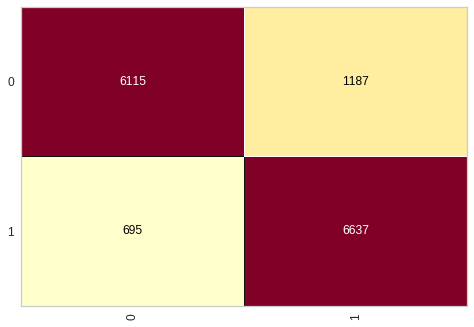

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7302
           1       0.85      0.91      0.88      7332

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



In [ ]:
score_random = 0.8713953806204728

> **결과**  
87.13%의 정확도로 모델이 두 가지 결과를 모두 예측할 수 있었습니다. 매우 좋은 모델입니다.

> 모델의 가장 중요한 변수를 확인합니다.

In [ ]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

lead_time                               0.375165
no_of_special_requests                  0.163952
avg_price_per_room                      0.106350
market_segment_type                     0.095152
arrival_month                           0.067997
arrival_year                            0.047530
arrival_date                            0.030981
no_of_weekend_nights                    0.026034
no_of_week_nights                       0.024160
no_of_adults                            0.018491
type_of_meal_plan                       0.013311
required_car_parking_space              0.010086
room_type_reserved                      0.008493
repeated_guest                          0.004720
no_of_children                          0.003514
no_of_previous_bookings_not_canceled    0.003388
no_of_previous_cancellations            0.000675
dtype: float64

#### Extra Trees

> 여기서는 Extra Trees모델을 사용하고 엔트로피 및 지니 계산을 테스트합니다.

> GridSearch 적용.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  entropy
Score:  0.9230656443849942


> Extra Trees 실행

In [ ]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

0.9341260079267459

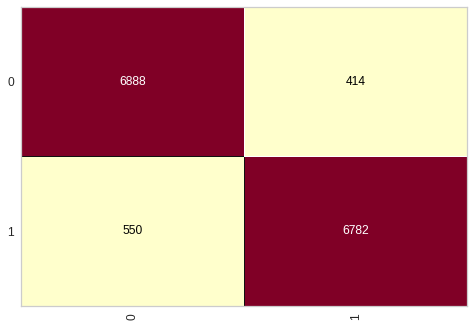

In [ ]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7302
           1       0.94      0.92      0.93      7332

    accuracy                           0.93     14634
   macro avg       0.93      0.93      0.93     14634
weighted avg       0.93      0.93      0.93     14634



In [ ]:
score_extra = 0.9341260079267459

> **결과**  
93.42%의 정확도를 가진 최고의 모델일 것입니다. 이 모델은 두 가지 결과를 모두 매우 잘 예측할 수 있었습니다.

> 모델의 가장 중요한 변수를 확인합니다.

In [ ]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)
feature_extra

lead_time                               0.276327
avg_price_per_room                      0.117736
no_of_special_requests                  0.112428
arrival_month                           0.093471
arrival_date                            0.091680
no_of_week_nights                       0.062540
market_segment_type                     0.055625
no_of_weekend_nights                    0.046157
arrival_year                            0.038622
no_of_adults                            0.032076
type_of_meal_plan                       0.023076
room_type_reserved                      0.020770
no_of_children                          0.009966
repeated_guest                          0.009486
required_car_parking_space              0.008694
no_of_previous_bookings_not_canceled    0.000745
no_of_previous_cancellations            0.000600
dtype: float64

#### K Means

> 여기서는 K Means 모델을 사용합니다.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)

In [ ]:
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
classification_kmeans_standard

0.6756184228508951

In [ ]:
score_kmeans = 0.6756184228508951

> **결과**  
67.56%의 정확도로 좋은 모델이 아닙니다.

#### K Neighbors

> 여기서는 K-Neighbors 모델을 사용하고 그리드 검색 모델을 사용하여 이 모델에서 사용할 수 있는 최상의 metrics를 알아보겠습니다.
GridSearch을 사용하여 이 모델에서 사용할 수 있는 최상의 메트릭을 알아보겠습니다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8205939202249165)

> K Neighbors 실행.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

0.8733770671040044

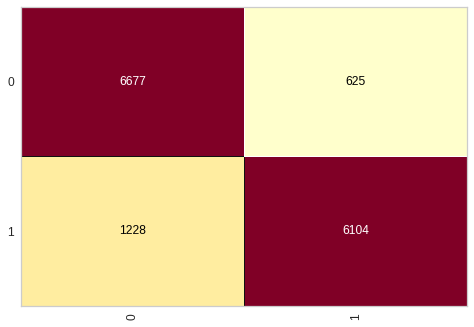

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7302
           1       0.91      0.83      0.87      7332

    accuracy                           0.87     14634
   macro avg       0.88      0.87      0.87     14634
weighted avg       0.88      0.87      0.87     14634



In [ ]:
score_knn = 0.8733770671040044

> **결과**  
87.33%의 정확도로 아주 좋은 모델입니다.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

0.7794861281946153

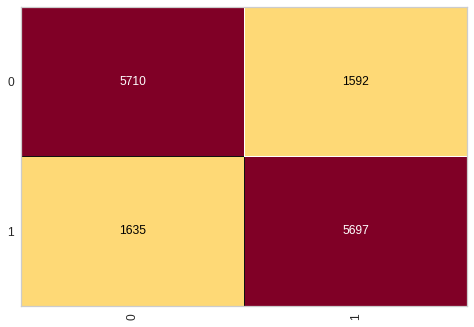

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7302
           1       0.78      0.78      0.78      7332

    accuracy                           0.78     14634
   macro avg       0.78      0.78      0.78     14634
weighted avg       0.78      0.78      0.78     14634



In [ ]:
logistic_normal = 0.7794861281946153

> **결과**  
77.95%의 정확도로 나쁜 모델은 아니지만 최상의 모델도 아닙니다.

#### AdaBoost

> 여기서는 AdaBoost 모델을 사용하고 GridSearch 모델을 사용하여 이 모델에서 사용할 수 있는 최상의 메트릭을 확인합니다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([2. , 2.5, 1.9, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

In [ ]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.9
Score:  0.8196567648048212


In [ ]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.9, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

0.8206915402487358

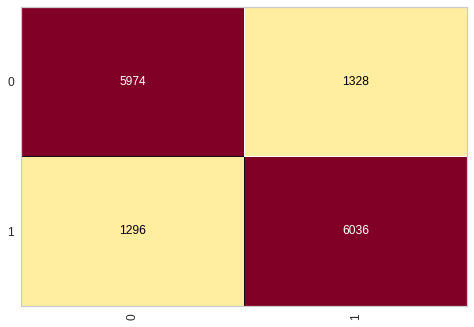

In [ ]:
cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_ada_scaler = (classification_report(y_test, previsoes))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7302
           1       0.82      0.82      0.82      7332

    accuracy                           0.82     14634
   macro avg       0.82      0.82      0.82     14634
weighted avg       0.82      0.82      0.82     14634



In [ ]:
score_ada_scaler = 0.8206915402487358

> **결과**  
82.06%의 정확도로 나쁜 모델은 아니지만 최고도 아닙니다.

#### Gradient Boosting

> 여기서는 Gradient Boosting 모델을 사용하고, 여기서는 Grid Search 모델을 사용하여 이 모델에서 사용할 수 있는 최상의 metrics를 파악합니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = GradientBoostingClassifier()
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.02 , 0.05 , 0.07 , 0.09 , 0.1  , 0.3  , 0.5  , 0.005]),
                         'n_estimators': array([300])})

In [ ]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Score:  0.8820065018555138


In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

0.8838321716550499

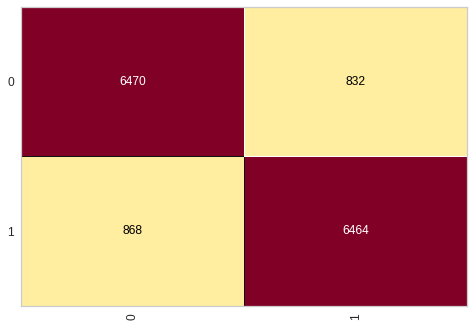

In [ ]:
cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_grad_standard = (classification_report(y_test, previsoes))
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7302
           1       0.89      0.88      0.88      7332

    accuracy                           0.88     14634
   macro avg       0.88      0.88      0.88     14634
weighted avg       0.88      0.88      0.88     14634



In [ ]:
score_grad_standard = 0.8838321716550499

> **결과**  
88.38%로 좋은 모델입니다.

#### Neural Network

In [ ]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_convert, test_size = 0.3, random_state = 0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers

model = Sequential()
model.add(Dense(200, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))

from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

model.fit(X_train, y_train, epochs = 100, batch_size = 400, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
86/86 [==============================] - 4s 23ms/step - loss: 0.5035 - acc: 0.7622 - val_loss: 0.4430 - val_acc: 0.7946
Epoch 2/100
86/86 [==============================] - 2s 18ms/step - loss: 0.4350 - acc: 0.7962 - val_loss: 0.4316 - val_acc: 0.8005
Epoch 3/100
86/86 [==============================] - 2s 18ms/step - loss: 0.4228 - acc: 0.8056 - val_loss: 0.4162 - val_acc: 0.8074
Epoch 4/100
86/86 [==============================] - 2s 18ms/step - loss: 0.4115 - acc: 0.8095 - val_loss: 0.4062 - val_acc: 0.8109
Epoch 5/100
86/86 [==============================] - 1s 10ms/step - loss: 0.4045 - acc: 0.8143 - val_loss: 0.3995 - val_acc: 0.8150
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 0.3952 - acc: 0.8181 - val_loss: 0.3919 - val_acc: 0.8252
Epoch 7/100
86/86 [==============================] - 1s 9ms/step - loss: 0.3914 - acc: 0.8209 - val_loss: 0.3866 - val_acc: 0.8230
Epoch 8/100
86/86 [==============================] - 1s 10ms/step - loss: 0.38

> 신경망 모델을 사용하여 87.19%의 정확도를 얻었고, 2개의 입력 레이어와 1개의 출력을 사용했습니다. 첫 번째 레이어는 200개의 뉴런을 사용했고, 두 번째 레이어는 100개의 뉴런을 사용했으며, 두 레이어 사이에 드롭아웃이 0.2개인 최적화 도구로 Adam을 사용했습니다.

In [ ]:
score_neural_network = 0.8719

#### -주요 변수 확인.


> CHI - 2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score'])

In [ ]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
lead_time,797722.63
avg_price_per_room,12869.91
no_of_previous_bookings_not_canceled,5390.79
no_of_special_requests,4088.34
repeated_guest,819.60
required_car_parking_space,485.70
no_of_week_nights,441.53
no_of_previous_cancellations,418.67
no_of_weekend_nights,183.33
market_segment_type,132.63


> Decision Tree

In [ ]:
feature_imp

lead_time                               0.407987
market_segment_type                     0.151215
no_of_special_requests                  0.132067
avg_price_per_room                      0.102131
arrival_month                           0.061918
arrival_date                            0.030956
no_of_week_nights                       0.026384
no_of_weekend_nights                    0.025761
no_of_adults                            0.022820
arrival_year                            0.015264
required_car_parking_space              0.009477
type_of_meal_plan                       0.009072
room_type_reserved                      0.003504
no_of_children                          0.001242
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

> Random Forest

In [ ]:
feature_imp_random

lead_time                               0.375165
no_of_special_requests                  0.163952
avg_price_per_room                      0.106350
market_segment_type                     0.095152
arrival_month                           0.067997
arrival_year                            0.047530
arrival_date                            0.030981
no_of_weekend_nights                    0.026034
no_of_week_nights                       0.024160
no_of_adults                            0.018491
type_of_meal_plan                       0.013311
required_car_parking_space              0.010086
room_type_reserved                      0.008493
repeated_guest                          0.004720
no_of_children                          0.003514
no_of_previous_bookings_not_canceled    0.003388
no_of_previous_cancellations            0.000675
dtype: float64

> Extra Trees

In [ ]:
feature_extra

lead_time                               0.276327
avg_price_per_room                      0.117736
no_of_special_requests                  0.112428
arrival_month                           0.093471
arrival_date                            0.091680
no_of_week_nights                       0.062540
market_segment_type                     0.055625
no_of_weekend_nights                    0.046157
arrival_year                            0.038622
no_of_adults                            0.032076
type_of_meal_plan                       0.023076
room_type_reserved                      0.020770
no_of_children                          0.009966
repeated_guest                          0.009486
required_car_parking_space              0.008694
no_of_previous_bookings_not_canceled    0.000745
no_of_previous_cancellations            0.000600
dtype: float64

#### -결과 확인.

In [ ]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

neural_dict_v1 = {'Model':'Neural Network',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_neural_network}

In [ ]:
resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'Neural Network':pd.Series(neural_dict_v1)
                      })

In [ ]:
resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,K-Means,KNN,Logistic Regression,AdaBoost,GradientBoosting,Neural Network
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Means,KNN,Logistic Regression,AdaBoost,GradientBoost,Neural Network
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal,Normal Data,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,-,-,-
Precision,0.566284,0.866544,0.871395,0.934126,0.675618,0.873377,0.779486,0.820692,0.883832,0.8719


### 4.Conclusion.

> 데이터를 보면 수치적이고 연속적이라는 것과 null 값이 없다는 것을 알 수 있다. 상관 관계를 보면 데이터 간에 강한 상관 관계가 없음을 알 수 있으며, 일부 특이치가 있지만 모델 생성에 영향을 미치지 않았다는 것을 알 수 있다. target을 보면, 취소되거나 그렇지 않은 예약의 일부 패턴을 볼 수 있는데 가장 중요한 것은 lead_time 변수이다. 일반적으로 lead_time이 긴 예약은 취소될 가능성이 높다. 또한 다른 흥미로운 insight는 이전에 머물렀던 손님들과 주차 공간을 요청하는 손님들 또는 특별한 요청을 하는 손님들 또한 취소할 가능성이 적었다.  
> target에서 lead_Time 변수를 보면 비슷한 패턴을 볼 수 있는데 lead_time이 짧으면 예약을 취소하지 않을 가능성이 높지만, 몇 가지 특수성이 있는데, 예를 들어 방의 평균 비용과 비교했을 때, 우리는 방의 가격이 높을수록 그리고 lead_time이 길수록 취소될 가능성이 더 높다는 것을 알 수 있다.  
> 기계 학습 모델에 대해 이야기하면, 데이터베이스에는 취소보다 취소되지 않은 데이터가 훨씬 더 많기 때문에 클래스의 균형을 맞춰야 했다. 그래서 오버샘플링을 사용했다. 모델을 실행했을 때, 그다지 좋지 않은 모델과 예외적인 모델이 있었는데, 최고의 모델은 93.42%의 정확도를 가진 Extra Trees였다.  
> 모델이 최종 결과에 도달하기 위한 가장 중요한 변수는 Lead_Time 변수였고, Avg_price_room 및 Number of Special requests가 그 뒤를 이었으며, 이는 앞서 데이터 분석에서 확인할 수 있었다.